In [200]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def proximal_lowertri(lamb, gamma, theta):
    p=len(theta[0,:])
    output=np.zeros((p,p))
    for i in range(p):
        for k in range(i):
            if theta[i,k]/gamma>lamb:output[i,k]=theta[i,k]-gamma*lamb
            elif theta[i,k]/gamma<-lamb:output[i,k]=theta[i,k]+gamma*lamb
    return output

In [28]:
def B_barr_lowertri(x):
    p=len(x)
    output=np.zeros((p,p))
    for i in range(p):
        for k in range(i):
            if x[i]==x[k]:output[i,k]=1
    return output

In [30]:
def simulate(P,X):
    u=np.random.uniform()
    j=P[0]
    x=X[0]
    for k in range(np.size(P)):
        if u>j:
            j+=P[k+1]
            x=X[k+1]
        else: break 
    return x  

In [31]:
def un_normalized_f(x,theta):
    p=len(x)
    B=B_barr(x)
    return np.exp(sum(theta[B==1]))
    

In [68]:
def conditional(k,x,theta,M):
    conditional=np.zeros(M)
    for i in range(1,M+1):
        x[k]=i
        B=B_barr_lowertri(x)
        conditional[i-1]=np.exp(sum(theta[k,:][B[k,:]==1])+sum(theta[:,k][B[:,k]==1]))
    conditional/=sum(conditional)
    return conditional
    
    

In [ ]:
def Gibbs_sampler(x,m,theta,M):
    p=len(x)
    l=np.zeros((m,p))
    for i in range(m):
        for j in range(p):
            x[j]=simulate(conditional(j,x,theta,M), np.linspace(1,M,M))
        
        l[i,:]=x
    return l    

In [310]:
def gradient_approx_Gibbs(m,x,sample_mean_B_barr,theta,M):
    l=Gibbs_sampler(x,m,theta,M)
    H=[B_barr_lowertri(x) for x in l]
    return sample_mean_B_barr-np.sum(H,axis=0)/m,l[m-1,:]
    

In [375]:
def proximal_gradient_solver_1(M,X,n):
    N,p=np.shape(X)
    lamb=2.5*np.sqrt(np.log(p)/n)
    x=np.random.randn(p)
    sample_mean_B_barr=np.zeros((p,p))
    for i in range(N):
        sample_mean_B_barr+=B_barr_lowertri(X[i,:])
    sample_mean_B_barr/=N
    theta=10*np.random.randn(p,p)
    #theta=np.ones((p,p))
    theta=np.tril(theta)-np.diag(np.diag(theta))
    f=1/p
    #output=[]
    output=np.zeros((n+1,p,p))
    output[0,:,:]=theta
    lamb=2.5*np.sqrt(np.log(p)/50)
    #print(p/lamb*np.log(M))
    #print(lamb)
    #print(theta)
    for i in range(1,n+1):
        print(i)
        grad_l,x=gradient_approx_Gibbs(500,x,sample_mean_B_barr,theta,M)
        gamma=25*f*np.power(i,-0.7)
        theta=proximal_lowertri(lamb, gamma, theta+gamma*grad_l)
        print(theta)
        #output.append(theta)
        output[i,:,:]=theta
    return output
        
    
    

In [376]:
p=10
theta_true=np.zeros((p,p))
non_zero_entries=np.random.randint(0.5*p*(p-1), size=p)
l=0
x=np.random.randn(p)
for i in range(p):
    for k in range(i):
        if l in non_zero_entries:
            u=np.random.uniform()
            r=np.random.uniform(1,4)
            if u>0.5:theta_true[i,k]=r
            else: theta_true[i,k]=-r
        l+=1
        

In [377]:
theta_true

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.79618114,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -2.85968666,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -1.92110559,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [378]:
X=Gibbs_sampler(x,500,theta_true,M)
X=X[250:]

In [379]:
M

20

In [380]:
vals=proximal_gradient_solver_1(M,X,55)

1
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.77814891e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.46690114e+00  5.66369942e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.95415503e+00 -7.32057784e-01  5.35816119e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.15831769e+01 -1.92430569e+00 -1.17873004e+01 -1.92612498e+01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.68530557e+00  1.36182030e+01  5.40343615e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [-14.09661042   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           3.3946527    0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  2.12996817   0.           0.66835209   0.           0.
    0.           0.           0.           0.           0.        ]
 [ -7.87273058   0.          -5.92917426 -15.8064797    0.
    0.           0.           0.           0.           0.        ]
 [  1.34082966   8.85259221   2.24394308   0.           0.
    0.           0.           0.           0.           0.        ]
 [  2.22610034   0.           0.          -5.35173328   1.07689265
    3.4005814    0.           0.           0.           0.        ]
 [ -1.59626647   5.37220851   0.           0.          -4.46562963
   -3.67889389   0.           0.    

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [-12.29432243   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           3.08740013   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.07472834   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -6.05793737   0.          -3.06477298 -14.11673867   0.
    0.           0.           0.           0.           0.        ]
 [  0.           5.65681354   0.35229591   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.27813659   0.           0.          -3.48866794   0.
    1.17758496   0.           0.           0.           0.        ]
 [  0.           2.65211565   0.           0.          -2.66787214
   -1.96870271   0.           0.           0

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [-11.00130578   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           2.80819239   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -4.7565426    0.          -1.02448349 -12.90446667   0.
    0.           0.           0.           0.           0.        ]
 [  0.           3.66441498   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          -2.15677943   0.
    0.           0.           0.           0.           0.        ]
 [  0.           1.06233486   0.           0.          -1.38905581
   -0.75006949   0.           0.           0

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -9.96642759   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           2.58804621   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -3.71498163   0.           0.         -11.93421322   0.
    0.           0.           0.           0.           0.        ]
 [  0.           2.39073522   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          -1.10314122   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          -0.39991206
    0.           0.           0.           0

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -9.09179749   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           2.47362295   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -2.8386879    0.           0.         -11.1142009    0.
    0.           0.           0.           0.           0.        ]
 [  0.           1.43662398   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          -0.23518656   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.       

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -8.43148382   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           2.40573667   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -2.17647564   0.           0.         -10.49512164   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.79712962   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.       

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-7.73903125  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          2.35869058  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-1.48981991  0.          0.         -9.84591045  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.15304353  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          2.58893023  0.03798936  0.          0.          0

In [271]:
for i in range(N):
        sample_mean_B_barr+=B_barr_lowertri(X[i,:])

In [273]:
sample_mean_B_barr/N

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.384, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.136, 0.08 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.024, 0.048, 0.056, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.176, 0.112, 0.008, 0.056, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.08 , 0.064, 0.008, 1.24 , 0.056, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.088, 0.096, 0.   , 0.032, 0.112, 0.008, 0.   , 0.   , 0.   ,
        0.   ],
       [0.056, 0.104, 0.12 , 0.08 , 0.064, 0.096, 0.048, 0.   , 0.   ,
        0.   ],
       [0.12 , 0.072, 1.816, 0.056, 0.   , 0.   , 0.   , 0.096, 0.   ,
        0.   ],
       [0.128, 0.08 , 1.744, 0.08 , 0.   , 0.016, 0.008, 0.08 , 1.856,
        0.   ]])

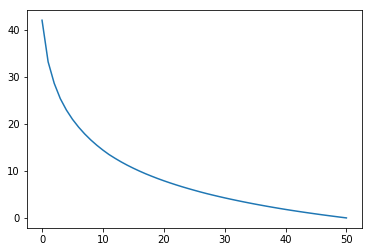

In [344]:
err=[]
for i in range(51):
    err.append(np.linalg.norm(vals[i,:,:]-vals[50,:,:],'fro'))
plt.plot(err)

In [381]:
def proximal_gradient_solver_2(M,X,n):
    N,p=np.shape(X)
    lamb=2.5*np.sqrt(np.log(p)/n)
    x=np.random.randn(p)
    sample_mean_B_barr=np.zeros((p,p))
    for i in range(N):
        sample_mean_B_barr+=B_barr_lowertri(X[i,:])
    sample_mean_B_barr/=N
    theta=10*np.random.randn(p,p)
    theta=np.tril(theta)-np.diag(np.diag(theta))
    f=1/p
    #output=[]
    output=np.zeros((n+1,p,p))
    output[0,:,:]=theta
    gamma=25*f*np.power(50,-0.5)
    lamb=2.5*np.sqrt(np.log(p)/50)
    print(theta)
    for i in range(1,n+1):
        print('i=',i)
        grad_l,x=gradient_approx_Gibbs(int(500+np.power(i,1.2)),x,sample_mean_B_barr,theta,M)
        theta=proximal_lowertri(lamb, gamma, theta+gamma*grad_l)
        print(theta)
        #output.append(theta)
        output[i,:,:]=theta
    return output

In [382]:
val_2=proximal_gradient_solver_2(M,X,50)

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  9.29280955   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -4.5810877  -20.62980219   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [-10.86794531  -2.051573    -8.30425577   0.           0.
    0.           0.           0.           0.           0.        ]
 [ -2.33589453  -7.5780371   -6.29114203  -2.19899587   0.
    0.           0.           0.           0.           0.        ]
 [ -0.20767534  14.00071157  -4.5529604  -11.31240748   1.08707765
    0.           0.           0.           0.           0.        ]
 [  7.18816796   1.09056234 -34.38380286  -5.10328702  -3.66146405
  -27.07474475   0.           0.           0.           0.        ]
 [  1.97733321   2.8929721    3.42629711   4.45801278   4.08892561
   -7.15921126  16.16247993 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.20480122e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.34967926e+00 -1.76673963e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-9.65350743e+00 -8.37135122e-01 -7.08981789e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.14007447e+00 -5.64291265e+00 -4.34696995e+00 -1.13165117e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.04499882e+00  1.08940559e+01 -3.22821386e+00 -1.00725138e+01
   1.94518118e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  4.18893148   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -2.11896406 -14.7049905    0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -8.43906955   0.          -5.87538001   0.           0.
    0.           0.           0.           0.           0.        ]
 [ -0.26853487  -4.57063799  -2.40689722  -0.06892787   0.
    0.           0.           0.           0.           0.        ]
 [ -0.81018371   7.78808154  -1.90346733  -8.83262004   0.
    0.           0.           0.           0.           0.        ]
 [  4.5395437    0.         -31.92098597  -2.72882038  -4.4996172
  -24.62889843   0.           0.           0.           0.        ]
 [  0.           0.73889729   1.28113506   2.23907934   0.
   -4.72706356   9.94729927   0.           0.

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.14427764e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.96348263e-01 -1.12488504e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.02222536e+00  0.00000000e+00 -4.46119544e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.78090594e+00 -1.62098757e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.75881126e-02  4.45160086e+00 -3.61910956e-01 -7.38607736e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.6635952    0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          -8.28644451   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -5.80778748   0.          -3.24805864   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          -2.9455402    0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           2.32466709   0.          -6.14683236   0.
    0.           0.           0.           0.           0.        ]
 [  1.18312144   0.         -29.25293435  -0.12204422  -2.47457624
  -21.97923158   0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   -2.17078419   4.0800807    0.           0

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          -4.83219734   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -4.39094329   0.          -1.83944055   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          -1.99230254   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.6618355    0.          -4.70092786   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.         -27.81629117   0.          -1.13700119
  -20.5524879    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   -0.84112468   1.80149927   0.           0

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          -1.46609375   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ -2.9753462    0.          -0.46808429   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          -0.99172143   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          -3.2574449    0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.         -26.37964798   0.           0.
  -19.12574421   0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.24736749   0.           0.       

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.25142743e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.57578404e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.82223314e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00

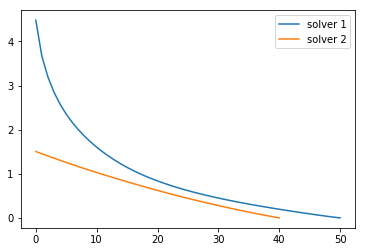

In [383]:
err=[]
for i in range(51):
    err.append(np.linalg.norm(vals[i,:,:]-vals[50,:,:],'fro')/np.linalg.norm(vals[50,:,:],'fro'))
err2=[]
for i in range(41):
    err2.append(np.linalg.norm(val_2[i,:,:]-val_2[40,:,:],'fro')/np.linalg.norm(val_2[40,:,:],'fro'))

plt.plot(err, label='solver 1')
plt.plot(err2, label='solver 2')
plt.legend()

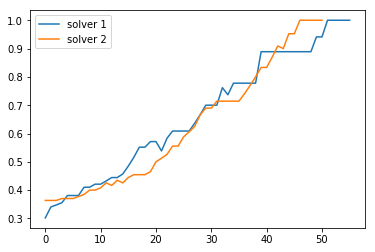

In [385]:
S1=sum(sum(abs(vals[55,:,:])>0))
S2=sum(sum(abs(val_2[50,:,:])>0))
prec=[]
sen=[]
for i in range(56):
    prec.append(sum(sum(np.logical_and(abs(vals[i,:,:])>0,abs(vals[55,:,:])>0)))/S1)
    sen.append(sum(sum(np.logical_and(abs(vals[i,:,:])>0,abs(vals[55,:,:])>0)))/sum(sum(abs(vals[i,:,:])>0)))
F_1=[]
for i in range(56):
    F_1.append(2*prec[i]*sen[i]/(prec[i]+sen[i]))
prec2=[]
sen2=[]
for i in range(51):
    prec2.append(sum(sum(np.logical_and(abs(val_2[i,:,:])>0,abs(val_2[50,:,:])>0)))/S2)
    sen2.append(sum(sum(np.logical_and(abs(val_2[i,:,:])>0,abs(val_2[50,:,:])>0)))/sum(sum(abs(val_2[i,:,:])>0)))
F_2=[]
for i in range(51):
    F_2.append(2*prec2[i]*sen2[i]/(prec2[i]+sen2[i]))
plt.plot(F_1, label='solver 1')
plt.plot(F_2, label='solver 2')
plt.legend()

In [254]:
S1

22

In [233]:
vals[80,:,:]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [355]:
s=0
for i in range(50):
    s+=500+np.power(i+1,1.2)

In [357]:
s/500

55.079491584640984